# Kaggle sales data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_sales = pd.read_csv('sales_data_kaggle.csv')
df_sales.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
df_sales.describe()

,Product_ID,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1050.128000,5019.265230,25.355000,2475.304550,2728.440120,0.15239
std,29.573505,2846.790126,14.159006,1417.872546,1419.399839,0.08720
min,1001.000000,100.120000,1.000000,60.280000,167.120000,0.00000
25%,1024.000000,2550.297500,13.000000,1238.380000,1509.085000,0.08000
50%,1051.000000,5019.300000,25.000000,2467.235000,2696.400000,0.15000
75%,1075.000000,7507.445000,38.000000,3702.865000,3957.970000,0.23000
max,1100.000000,9989.040000,49.000000,4995.300000,5442.150000,0.30000


In [5]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [6]:
df_sales.shape

(1000, 14)

In [7]:
df_sales.isnull().sum()

Product_ID              0
Sale_Date               0
Sales_Rep               0
Region                  0
Sales_Amount            0
Quantity_Sold           0
Product_Category        0
Unit_Cost               0
Unit_Price              0
Customer_Type           0
Discount                0
Payment_Method          0
Sales_Channel           0
Region_and_Sales_Rep    0
dtype: int64

In [9]:
df_sales = df_sales.sort_values(by='Sale_Date', ascending=True)
df_sales

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
237,1070,2023-01-01,Eve,South,783.18,12,Furniture,664.33,863.03,Returning,0.25,Bank Transfer,Retail,South-Eve
101,1089,2023-01-01,Charlie,North,8130.13,35,Clothing,4071.01,4304.70,New,0.14,Credit Card,Online,North-Charlie
64,1008,2023-01-01,Eve,North,5227.81,38,Clothing,4635.23,5075.44,Returning,0.05,Cash,Online,North-Eve
363,1064,2023-01-02,David,South,5533.70,10,Electronics,2242.01,2282.23,Returning,0.20,Credit Card,Online,South-David
899,1075,2023-01-02,David,West,919.09,26,Electronics,4535.38,4557.56,New,0.00,Credit Card,Online,West-David
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,1090,2023-12-31,Eve,West,3333.73,46,Clothing,4665.12,4675.90,New,0.19,Cash,Retail,West-Eve
523,1094,2023-12-31,Bob,South,6586.22,15,Food,4111.93,4338.67,Returning,0.26,Credit Card,Online,South-Bob
317,1018,2024-01-01,Alice,West,8579.72,24,Electronics,1362.78,1729.81,New,0.29,Bank Transfer,Online,West-Alice
873,1098,2024-01-01,Bob,South,2370.72,11,Clothing,213.41,503.36,Returning,0.27,Bank Transfer,Online,South-Bob


In [11]:
df_sales.groupby('Region')['Sales_Amount'].sum()

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64

In [14]:
day_sales = df_sales.groupby('Sale_Date')['Sales_Amount'].sum().reset_index()
day_sales

,Sale_Date,Sales_Amount
0,2023-01-01,14141.12
1,2023-01-02,6452.79
2,2023-01-03,21319.08
3,2023-01-04,30175.06
4,2023-01-05,16708.75
...,...,...
335,2023-12-28,7976.44
336,2023-12-29,20842.53
337,2023-12-30,26107.95
338,2023-12-31,28608.37


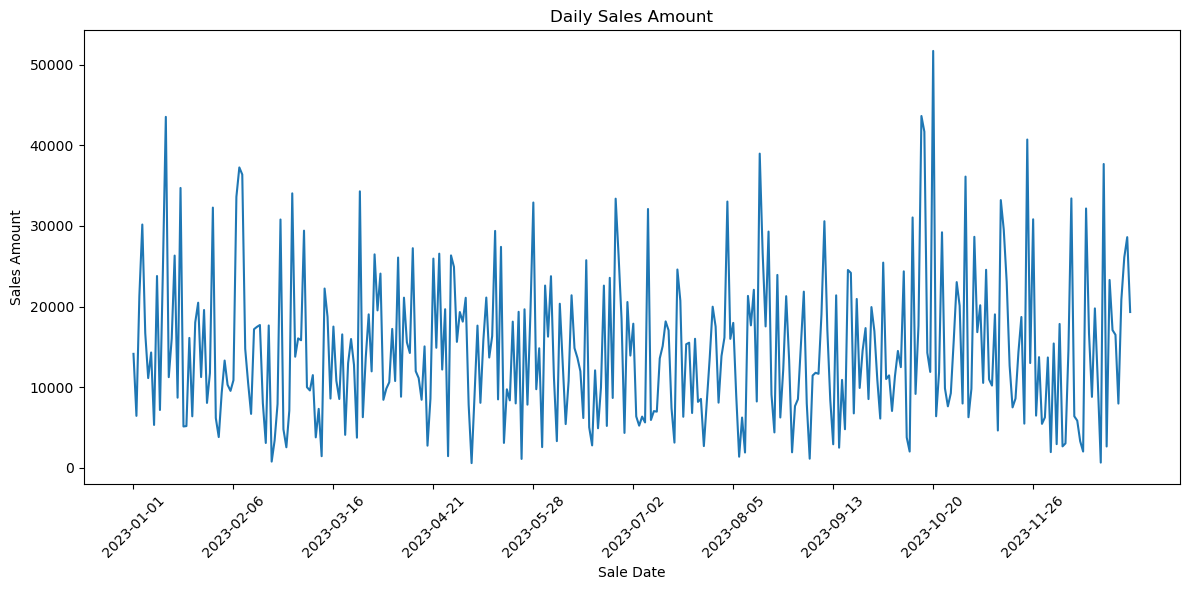

In [17]:
dates = day_sales['Sale_Date'].unique()
step = len(dates) // 10
selected_dates = dates[::step]


plt.figure(figsize=(12, 6))
sns.lineplot(data=day_sales, x='Sale_Date', y='Sales_Amount')  
plt.title('Daily Sales Amount')
plt.xlabel('Sale Date')
plt.ylabel('Sales Amount')
plt.xticks(ticks=selected_dates, rotation=45)
plt.tight_layout()
plt.show()

In [18]:
df_region = df_sales.groupby('Region')['Sales_Amount'].sum()
df_region

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64

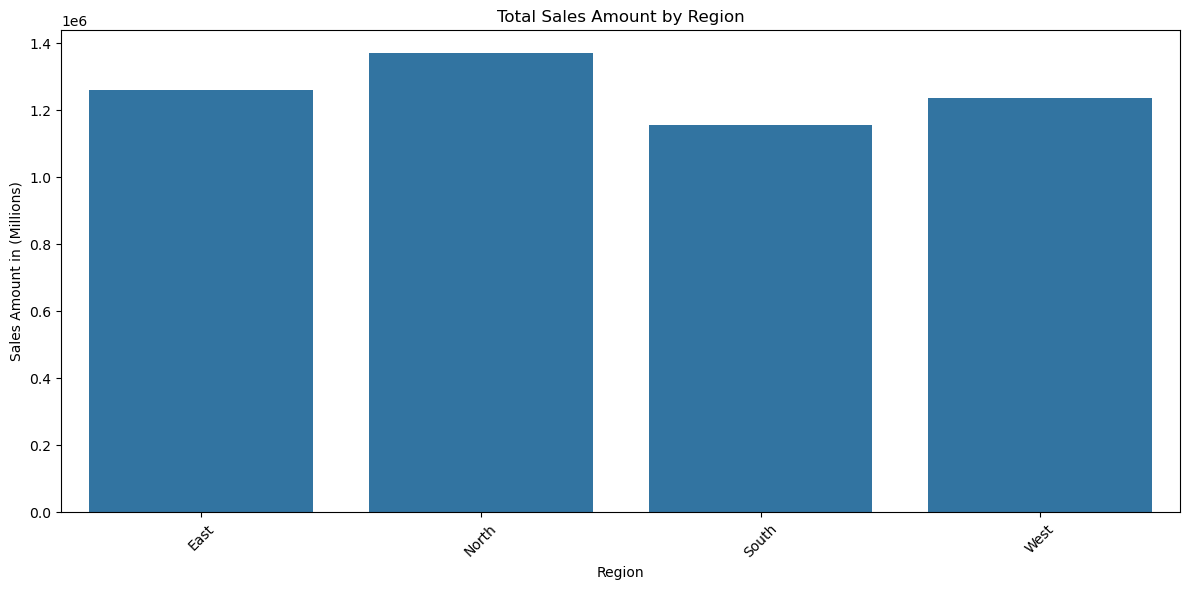

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_region.reset_index(), x='Region', y='Sales_Amount')
plt.title('Total Sales Amount by Region')
plt.xlabel('Region')
plt.ylabel('Sales Amount in (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
day_sales['Sales_Amount'].median()

13493.369999999999

In [24]:
q1 = day_sales['Sales_Amount'].quantile(0.25)
q3 = day_sales['Sales_Amount'].quantile(0.75)

In [28]:
outliers  = day_sales.loc[
    (day_sales['Sales_Amount'] < (q1 - 1.5 * (q3 - q1)))
      | (day_sales['Sales_Amount'] > (q3 + 1.5 * (q3 - q1)))
      ]

In [29]:
outliers

,Sale_Date,Sales_Amount
11,2023-01-12,43522.74
213,2023-08-14,38964.86
268,2023-10-15,43628.04
269,2023-10-16,41683.41
272,2023-10-20,51695.71
304,2023-11-24,40711.70
330,2023-12-22,37678.67
